### Design of experiments

This notebook illustrates generating samples using various design of experiments available in sciope. These designs are essentially single-shot in nature as opposed to sequential sampling.

In [1]:
# Imports
from sciope.designs import factorial_design as fd
from sciope.designs import latin_hypercube_sampling as lhs
from sciope.designs import random_sampling as rs

Generate 25 samples in a 2D space using each design. First we define the sampling space as a bounding box.

In [2]:
# Sample space
dmin = [0, 0]
dmax = [1, 1]

Then we instantiate objects of the designs.

In [3]:
# The factorial design takes the number of desired levels as input
# ... as opposed to the number of points.
# ... The number of generated points is levels^dimensionality.
fd_sampler = fd.FactorialDesign(levels=5, xmin=dmin, xmax=dmax)

lhs_sampler = lhs.LatinHypercube(dmin, dmax)

rs_sampler = rs.RandomSampling(dmin, dmax)

We are now ready to generate samples as follows.

In [4]:
# fd_sampler.generate() does not take an argument as we are constrained to generate levels^dim samples
factorial_samples = fd_sampler.generate()
lhs_samples = lhs_sampler.generate(n=25)
rs_samples = rs_sampler.generate(n=25)

The following plots reveal the sampling characteristics of each design.

In [5]:
# Imports
import matplotlib.pyplot as plt
import dask
from dask.distributed import Client
import numpy as np

# Start a dask cluster for computations
c = Client()

# LHS and RS return Dask delayed objects, so we compute them
lhs_samples ,= dask.compute(lhs_samples)
rs_samples ,= dask.compute(rs_samples)

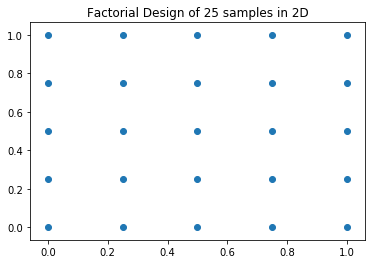

In [6]:
# Factorial design
plt.scatter(factorial_samples[:, 0], factorial_samples[:, 1])
plt.title('Factorial Design of 25 samples in 2D')
plt.show()

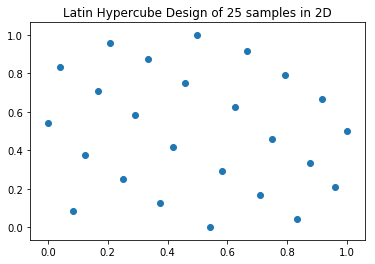

In [7]:
# The space-filling non-collapsable latin hypercube design
plt.scatter(lhs_samples[:, 0], lhs_samples[:, 1])
plt.title('Latin Hypercube Design of 25 samples in 2D')
plt.show()

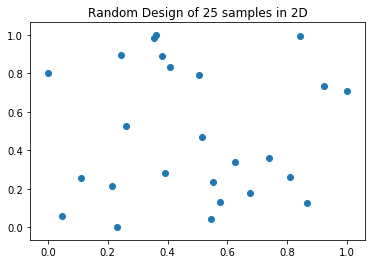

In [8]:
# Random design
plt.scatter(rs_samples[:, 0], rs_samples[:, 1])
plt.title('Random Design of 25 samples in 2D')
plt.show()

A useful feature when dealing with very large designs is the ability to 'draw' or sub-sample a small sample of points from the large design. Only the computations corresponding to the small subset will be performed. Here we demonstrate the idea using LHD sampling as an example.

In [9]:
# Instantiate the LHD sampler
large_lhs_sampler = lhs.LatinHypercube(dmin, dmax, use_logger=True)

# Draw 25 samples from the LHS object that holds a 'large' design of 50 total samples
lhs_samples_subset = large_lhs_sampler.draw(n_samples=25, n=50)

# Convert from the list of dask computed results to a numpy array
lhs_samples_subset ,= dask.compute(lhs_samples_subset)
lhs_samples_subset = np.asarray(lhs_samples_subset).reshape(25, 2)


2019-12-19 19:52:18,904 	 [INFO     | latin_hypercube_sampling.py:85] : Latin hypercube design in 2 dimensions initialized


Sciope logger is now ready. Log directory is /var/folders/2b/bpxpqjt14gdbrpmp0g3jxdv00000gn/T/Sciope_logs


Plot the 25 samples.

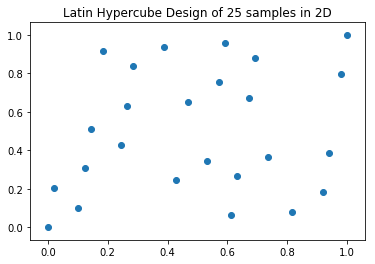

In [10]:
# The space-filling non-collapsable latin hypercube design
plt.scatter(lhs_samples_subset[:, 0], lhs_samples_subset[:, 1])
plt.title('Latin Hypercube Design of 25 samples in 2D')
plt.show()

We now draw the 25 remaining samples.

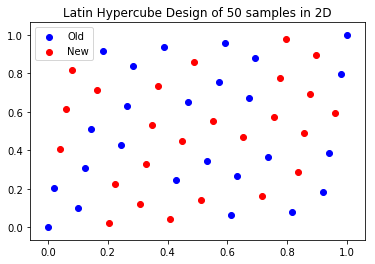

In [11]:
# Draw 25 additional samples
lhs_samples_subset2 = large_lhs_sampler.draw(n_samples=25)

# Convert from the list of dask computed results to a numpy array
lhs_samples_subset2 ,= dask.compute(lhs_samples_subset2)
lhs_samples_subset2 = np.asarray(lhs_samples_subset2).reshape(25, 2)

# Plot
plt.scatter(lhs_samples_subset[:, 0], lhs_samples_subset[:, 1], label='Old', color='b')
plt.scatter(lhs_samples_subset2[:, 0], lhs_samples_subset2[:, 1], label='New', color='r')
plt.legend()
plt.title('Latin Hypercube Design of 50 samples in 2D')
plt.show()